# Tensorflow Moment

In [1]:
import tensorflow as tf
# tensorflow is deep learning library
import numpy as np
import matplotlib.pyplot as plt

2024-04-10 22:26:27.566420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.15.0


format file buat tensor : NPZ file

## Generate Data

In [8]:
observations = 100
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1))

generated_target = 4 * xs + 12 * zs - 10 + noise

# save file in npz formate file
np.savez('TF_intro',input = generated_inputs,target = generated_target)

## Solving with TensorFlow

In [9]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                        )
])

# Optimizer tambahan
custom_optimizer = tf.keras.optimizers.SGD(learning_rate =0.02)
'''
lu bisa gini juga
model.compile(optimizer= 'sgd',loss='mean_squared_error')
buat penamaan, lu bisa buka dokumennya tf.keras

'''
model.compile(optimizer= custom_optimizer,loss='mean_squared_error')
model.fit(training_data['input'],training_data['target'],epochs = 100,verbose =2) 
'''
verbose : silent, no outpot
'''

Epoch 1/100


4/4 - 0s - loss: 1279.8868 - 307ms/epoch - 77ms/step
Epoch 2/100
4/4 - 0s - loss: 97.7996 - 6ms/epoch - 2ms/step
Epoch 3/100
4/4 - 0s - loss: 88.2891 - 6ms/epoch - 2ms/step
Epoch 4/100
4/4 - 0s - loss: 44.8911 - 5ms/epoch - 1ms/step
Epoch 5/100
4/4 - 0s - loss: 43.9095 - 6ms/epoch - 1ms/step
Epoch 6/100
4/4 - 0s - loss: 30.7942 - 5ms/epoch - 1ms/step
Epoch 7/100
4/4 - 0s - loss: 23.3356 - 5ms/epoch - 1ms/step
Epoch 8/100
4/4 - 0s - loss: 15.7510 - 5ms/epoch - 1ms/step
Epoch 9/100
4/4 - 0s - loss: 11.6570 - 5ms/epoch - 1ms/step
Epoch 10/100
4/4 - 0s - loss: 6.7313 - 6ms/epoch - 1ms/step
Epoch 11/100
4/4 - 0s - loss: 5.7016 - 5ms/epoch - 1ms/step
Epoch 12/100
4/4 - 0s - loss: 3.8305 - 5ms/epoch - 1ms/step
Epoch 13/100
4/4 - 0s - loss: 4.4915 - 5ms/epoch - 1ms/step
Epoch 14/100
4/4 - 0s - loss: 2.6217 - 5ms/epoch - 1ms/step
Epoch 15/100
4/4 - 0s - loss: 1.6995 - 5ms/epoch - 1ms/step
Epoch 16/100
4/4 - 0s - loss: 1.2251 - 6ms/epoch - 1ms/step
Epoch 17/100
4/4 - 0s - loss: 1.1795 - 5ms/epoc

'\nverbose : silent, no outpot\n'

## Extract the Weights and Bias

note : <br>
our model function <br>
4 * xs + 12 * zs - 10 + noise

In [11]:
model.layers[0].get_weights()

[array([[ 4.0569024],
        [11.953464 ]], dtype=float32),
 array([-9.998192], dtype=float32)]

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 4.0569024],
       [11.953464 ]], dtype=float32)

In [13]:
bias = model.layers[0].get_weights()[1]
bias

array([-9.998192], dtype=float32)

## Make Predictions

In [14]:
'''

Outputnya based on the train model

'''
model.predict_on_batch(training_data['input']).round(1)

array([[   8.9],
       [ -71. ],
       [ 131.8],
       [ -41.6],
       [ -98.2],
       [  35.4],
       [ -92.3],
       [ -56.7],
       [  69.9],
       [  69.9],
       [   2. ],
       [-123.8],
       [  73.5],
       [  83.7],
       [  90.6],
       [  87.8],
       [  75.6],
       [ -75.6],
       [ -78.8],
       [  88.2],
       [   0.9],
       [  24.8],
       [-112.6],
       [   4.9],
       [  33.7],
       [  24.9],
       [  49.5],
       [ -68.9],
       [  75.6],
       [ -96.5],
       [ -53.3],
       [  55.2],
       [ -26.8],
       [ 132.2],
       [ -59.5],
       [ 124.6],
       [  60. ],
       [ -46.3],
       [  98.8],
       [   5.1],
       [  42.6],
       [ -26.4],
       [-139.9],
       [  31.1],
       [  39.1],
       [ -23.7],
       [-119.2],
       [  75.3],
       [ -78. ],
       [  36. ],
       [  23.9],
       [ -52.6],
       [ -14.8],
       [  48. ],
       [  25.5],
       [   8.9],
       [  55. ],
       [-126. ],
       [  91.1

In [15]:
training_data['target'].round(1)

array([[   8.8],
       [ -70.5],
       [ 132.3],
       [ -40.5],
       [ -98.5],
       [  34.9],
       [ -93. ],
       [ -55.5],
       [  70.5],
       [  70.1],
       [   3.3],
       [-123.9],
       [  74. ],
       [  84.9],
       [  90.2],
       [  88.4],
       [  76.1],
       [ -77.1],
       [ -79. ],
       [  88.5],
       [   1.5],
       [  25.8],
       [-113.2],
       [   5.3],
       [  34.7],
       [  24.8],
       [  49.8],
       [ -68.9],
       [  75.4],
       [ -96.3],
       [ -54.4],
       [  56.6],
       [ -26.6],
       [ 132.6],
       [ -60.8],
       [ 125.1],
       [  59.4],
       [ -45.8],
       [  98.7],
       [   5.3],
       [  43.3],
       [ -27.1],
       [-139.5],
       [  31. ],
       [  39.5],
       [ -22.8],
       [-120.2],
       [  75.1],
       [ -78.7],
       [  35.8],
       [  24.7],
       [ -51.6],
       [ -15.5],
       [  48.3],
       [  26. ],
       [   8.6],
       [  54.3],
       [-126.7],
       [  90. 

## Plotting the Data

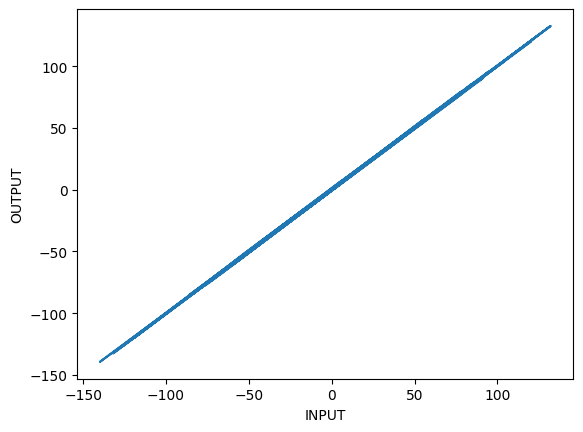

In [16]:
plt.plot(model.predict_on_batch(training_data['input']),training_data['target'])
plt.xlabel('INPUT')
plt.ylabel('OUTPUT')
plt.show()